In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('iris.data',header = None)

In [47]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df.columns = columns

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [51]:
df.shape

(150, 5)

In [54]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [55]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    X[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [57]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_arr = [1,2,3,5,10,15,20,25,30,35,40]
knn_model = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':k_arr})

In [68]:
knn_model.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30, 35,
                                         40]})

In [66]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [70]:
df_score = pd.DataFrame(knn_model.cv_results_)

In [72]:
df_score = pd.DataFrame(knn_model.cv_results_)[['params','mean_test_score']]

In [89]:
df_score.iloc[:,0][0]['n_neighbors']

1

In [97]:
df_score['params'] = df_score['params'].apply(lambda x:x['n_neighbors'])

In [98]:
df_score

,params,mean_test_score
0,1,0.946667
1,2,0.946667
2,3,0.953333
3,5,0.960000
4,10,0.960000
5,15,0.946667
6,20,0.946667
7,25,0.940000
8,30,0.920000
9,35,0.906667


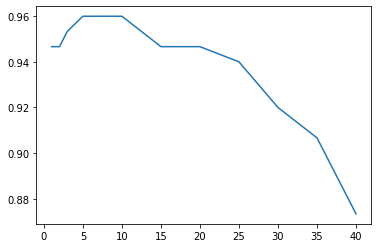

In [99]:
plt.plot(df_score.params,df_score.mean_test_score)